In [1]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt

In [2]:
#Cargando los datos
A=np.load('fit_exercise.npy')
x=A[0]
y=A[1]
sig=A[2]
sigma=0.05

In [16]:
#parámetros
#Número de pasos
N=10000
#Número de cadenas
c=4

In [4]:
#Funciones
# funcion del modelo
def f(x, a, b):
    return a + b*x

# Likelihood
def llh(a,b):
    #return -0.5*np.sum((y - f(x, *theta))**2/(sig**2))
    return -0.5*np.sum(np.log(2*np.pi*sig**2)+(y - f(x,a,b))**2/(sig**2))#Con este ya funciona

def prior():
    if sigma <= 0:
        return 0.0
    return 1
    
# Posterior
def p(a,b):
    return llh(a,b)-np.log(prior())

# Generador de muestras
def sample(a,b,tasa):
    a_new=np.random.normal(a, sigma)
    b_new=np.random.normal(b,sigma)
    p_old = p(a,b)
    p_new = p(a_new,b_new)
    if p_new>p_old:
            a=a_new
            b=b_new
            tasa=tasa+1
    else:
            p_accept= p_new - p_old
            accept = np.log(np.random.rand())
            if accept< p_accept:
                a= a_new
                b= b_new
                tasa=tasa+1
   
    return a,b,tasa

#Generador de chain
def cadena(n):
    #Vector donde se guardan las nuevas coordenadas de a y se genera número aleatorio de inicio.
    ap=np.array([np.random.uniform(0, 7)])
    #Vector donde se guardan las nuevas coordenadas de b y se genera número aleatorio de inicio.
    bp=np.array([np.random.uniform(-3, 3)])
    #creo una variable para el número de aceptados y la inicilizo en cero 
    acep=0
    for i in range(1,n):
        aux1,aux2,aux3=sample(ap[i-1],bp[i-1],acep)
        ap=np.append(ap,aux1)
        bp=np.append(bp,aux2)
        acep=aux3
    #porcentaje de aceptación
    porc=(acep/n)*100
    return ap,bp,porc

#Está función recibe el número de cadenas y el número de pasos
def multicad(ch,l):
    MA=np.empty((ch,l))
    MB=np.empty((ch,l))
    PA=np.zeros(ch)
    for i in range(ch):
        MA[i],MB[i],PA[i]=cadena(l)
    
    return MA,MB,PA   

In [17]:
matA,matB,t_acep=multicad(c,N)

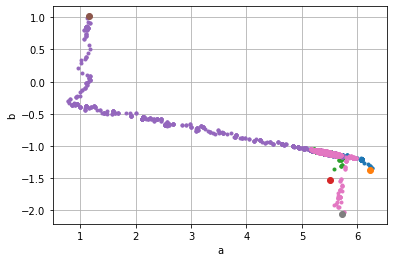

In [18]:
for i in range(c):
    plt.plot(matA[i],matB[i],'.')
    plt.plot(matA[i][0],matB[i][0],'o')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.show()

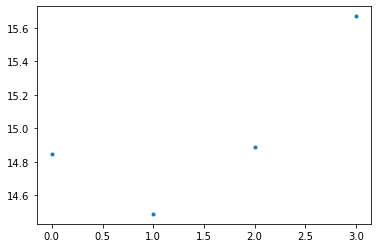

In [25]:
plt.plot(t_acep,'.')